In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plot
from sklearn.decomposition import PCA
from tensorflow.python import tf2
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

# Business Problem

#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# Data collection

In [2]:
ff = pd.read_csv(r"C:\\Users\\Dell\\Downloads\\forestfires.csv")

In [3]:
ff1 = ff.copy()

In [4]:
ff1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
ff1.drop(["month","day"],axis = 1,inplace = True)

In [6]:
ff1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
ff1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
ff1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outlier Check

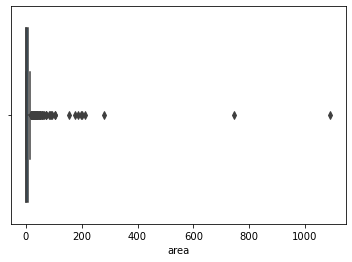

In [9]:
ax = sn.boxplot(ff1['area'])

#### There are 3 Outlier instances in our dataset.

In [10]:
plot.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


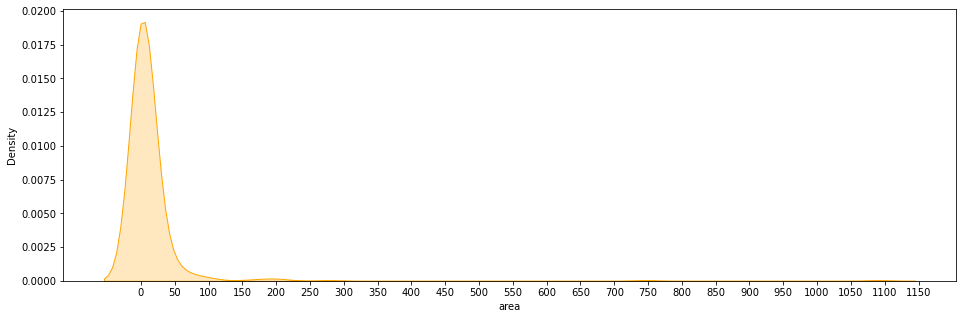

In [11]:
plot.figure(figsize = (16,5))
print("Skew: {}".format(ff1['area'].skew()))
print("Kurtosis: {}".format(ff1['area'].kurtosis()))
ax = sn.kdeplot(ff1['area'],shade = True,color = 'orange')
plot.xticks([i for i in range(0,1200,50)])
plot.show()

#### The Dataset is highly skewed and has large kurtosis value.
#### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land.

In [12]:
dfa = ff1[ff1.columns[0:10]]
month_colum = dfa.select_dtypes(include = 'object').columns.tolist()

In [13]:
plot.figure(figsize = (16,10))
for i,col in enumerate(month_colum,1):
    plot.subplot(2,2,i)
    sn.countplot(data = dfa,y = col)
    plot.subplot(2,2,i+2)
    ff1[col].value_counts(normalize = True).plot.bar()
    plot.ylabel(col)
    plot.xlabel('% distribution per category')
plot.tight_layout()
plot.show()  

<Figure size 1152x720 with 0 Axes>

#### Majority of the fires across in the month Aug and Sep.
#### For Days Sun and Fri have recoreded the most cases.

In [14]:
num_columns = dfa.select_dtypes(exclude = 'object').columns.tolist()

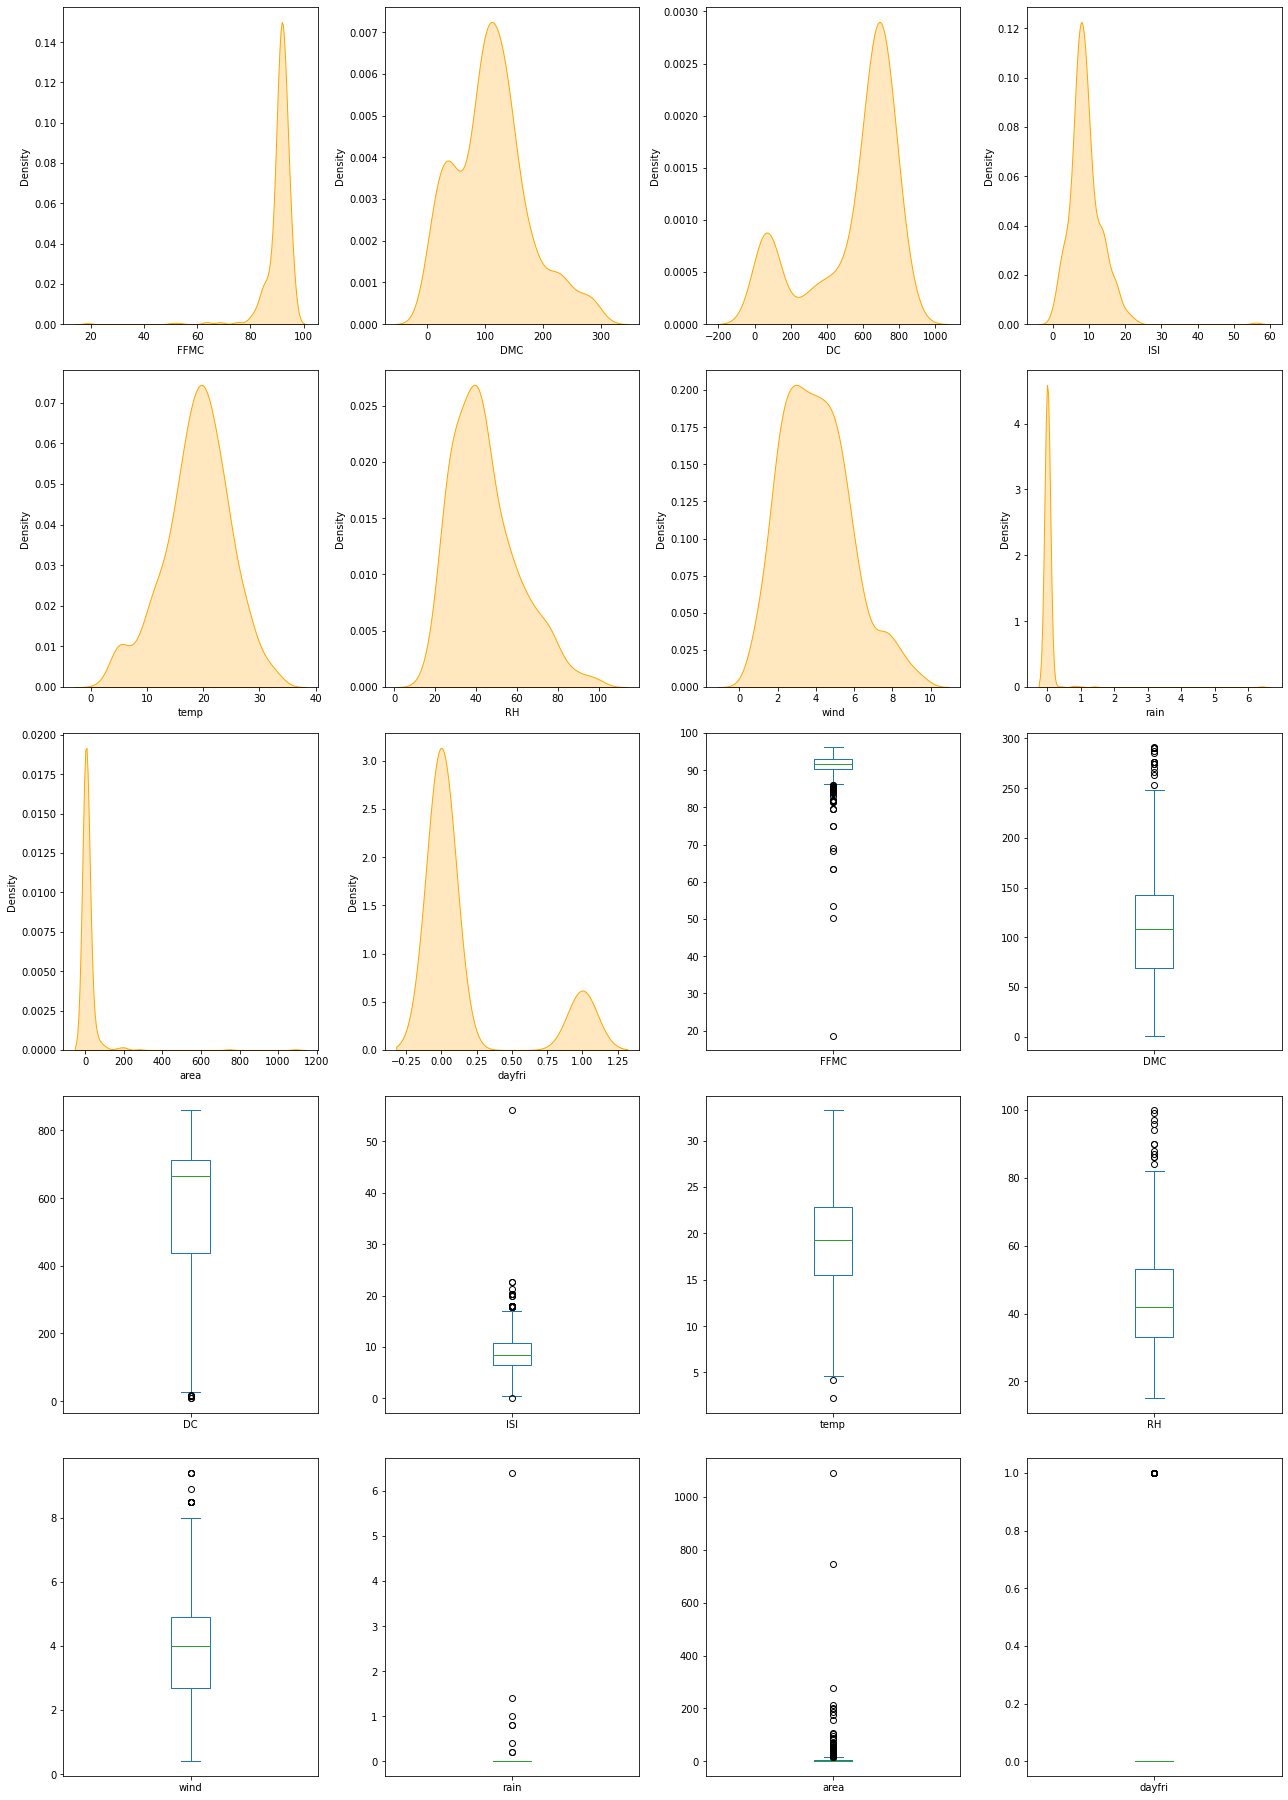

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [15]:
plot.figure(figsize = (18,40))
for i,col in enumerate(num_columns,1):
    plot.subplot(8,4,i)
    sn.kdeplot(ff[col],color = 'orange',shade = True)
    plot.subplot(8,4,i+10)
    ff[col].plot.box()
plot.tight_layout() 
plot.show()
num_data = ff[num_columns]
pd.DataFrame(data = [num_data.skew(),num_data.kurtosis()],index = ['skewness','kurtosis'])

# Finding Correlation

In [16]:
corr = ff1[ff1.columns[0:11]].corr()

<AxesSubplot:>

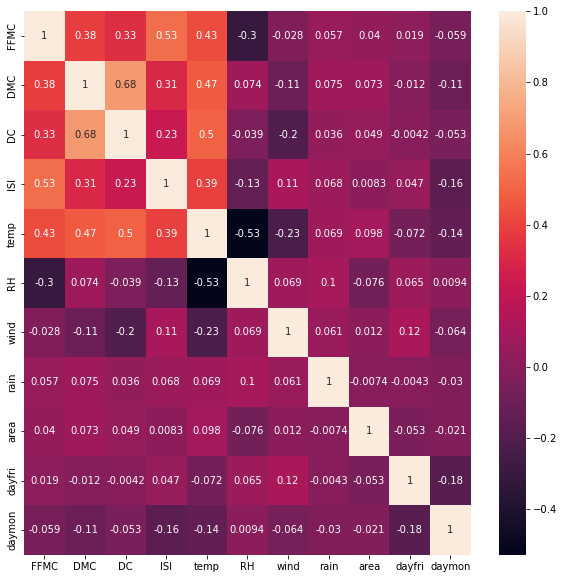

In [17]:
plot.figure(figsize = (10,10))
sn.heatmap(corr,annot = True)

# Neural Network

In [18]:
    mapping = {'small': 1, 'large': 2}

In [19]:
ff1 = ff1.replace(mapping)

In [20]:
X = np.array(ff1.iloc[:,0:28])
y = np.array(ff1.iloc[:,28])

In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
X_norm = norm_func(X)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_norm,y, test_size=  0.2,stratify = y)

In [24]:
model = Sequential()
model.add(Dense(12, input_dim = 28, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
42/42 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.7312
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: -0.0108 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 3ms/step - loss: -0.3642 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: -0.7438 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: -1.2109 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: -1.8085 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 3ms/step - loss: -2.6217 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 3ms/step - loss: -3.7056 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 3ms/step - loss: -5.1130 - accuracy: 0.7312
E

In [27]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 3ms/step - loss: -9594.3564 - accuracy: 0.7312
Accuracy: 73.12


# Inference

In [28]:
predictions = model.predict(x_train)

In [29]:
predictions = model.predict(x_train)

In [30]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
